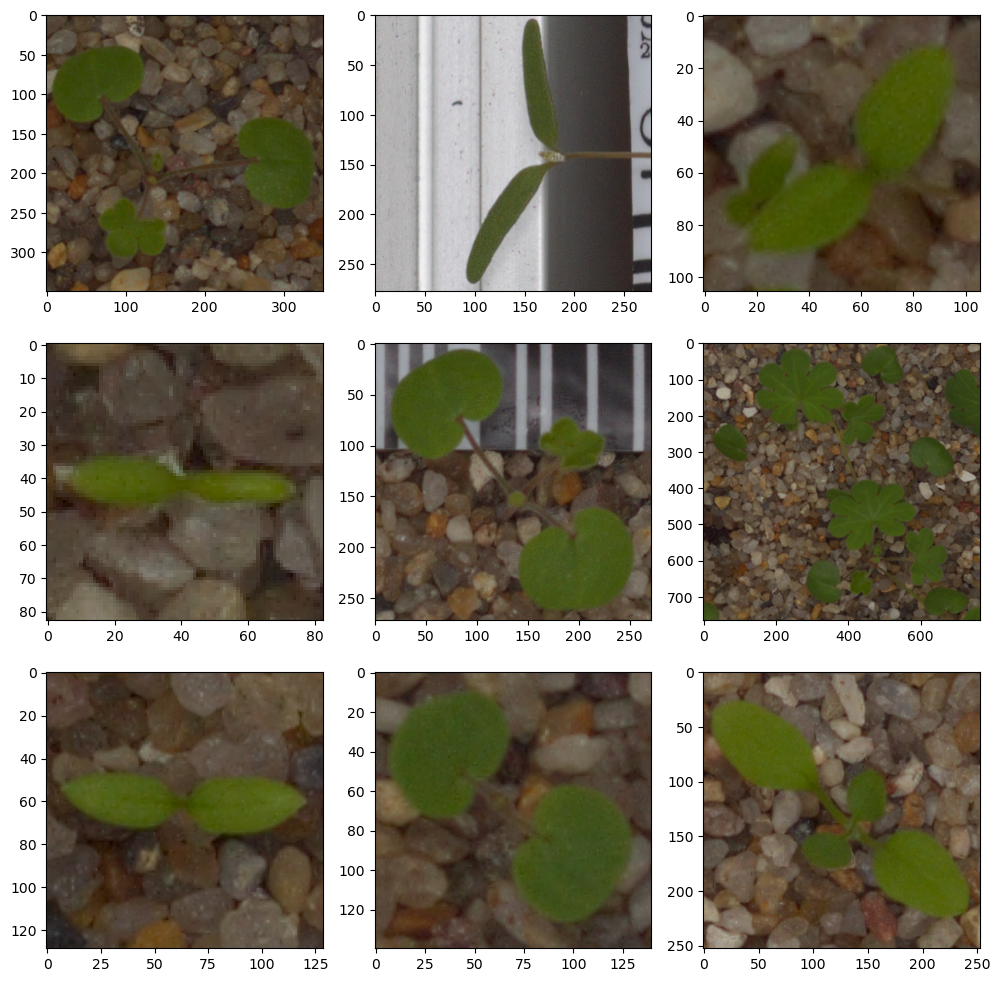

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Set the path to the directory containing the crop images
crop_dir = r'C:\Users\rakes\Weed_classification\weed_image_data\Ronin_OPEN_DB\Labeled_images\crop'
# Get a list of image file paths in the crop directory
image_files = [os.path.join(crop_dir, filename) for filename in os.listdir(crop_dir)]

# Set the number of rows and columns in the grid
rows = 3
cols = 3

# Create a figure and axes for the grid
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

# Iterate over the image files and plot them in the grid
for i, ax in enumerate(axes.flatten()):
    # Open the image file
    image = Image.open(image_files[i])
    # Plot the image
    ax.imshow(image)
    ax.axis('on')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()

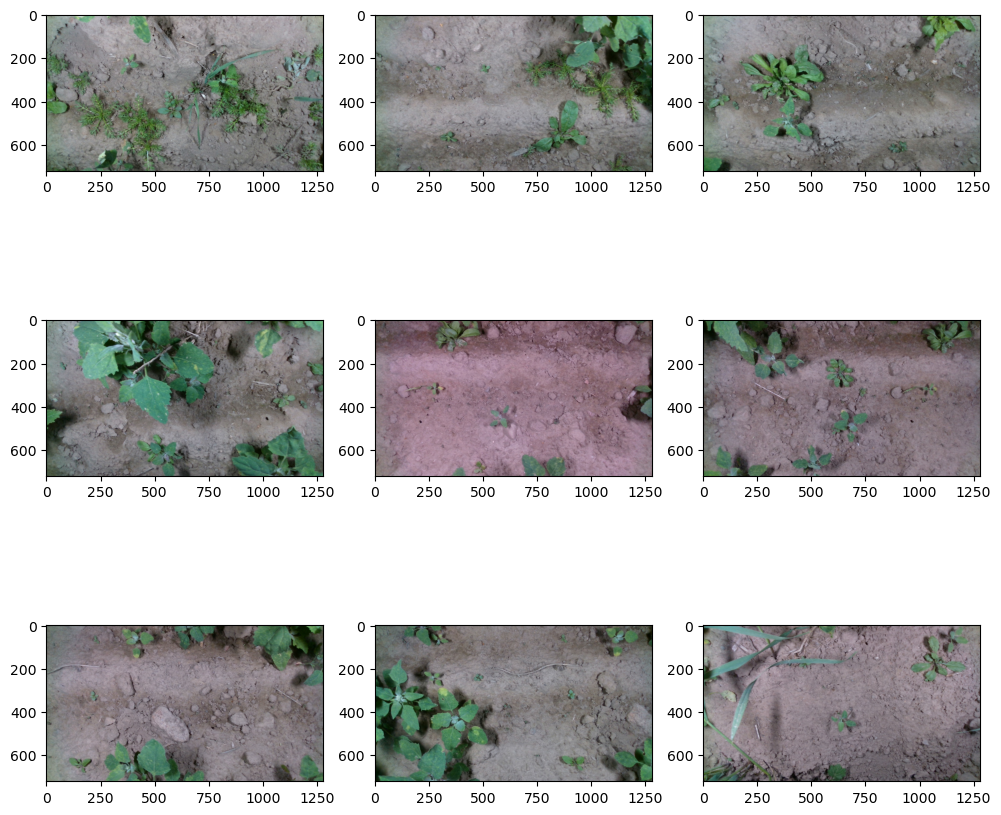

In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Set the path to the directory containing the crop images
crop_dir = r'C:\Users\rakes\Weed_classification\weed_image_data\Ronin_OPEN_DB\Labeled_images\weed'
# Get a list of image file paths in the crop directory
image_files = [os.path.join(crop_dir, filename) for filename in os.listdir(crop_dir)]

# Set the number of rows and columns in the grid
rows = 3
cols = 3

# Create a figure and axes for the grid
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

# Iterate over the image files and plot them in the grid
for i, ax in enumerate(axes.flatten()):
    # Open the image file
    image = Image.open(image_files[i])
    # Plot the image
    ax.imshow(image)
    ax.axis('on')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()

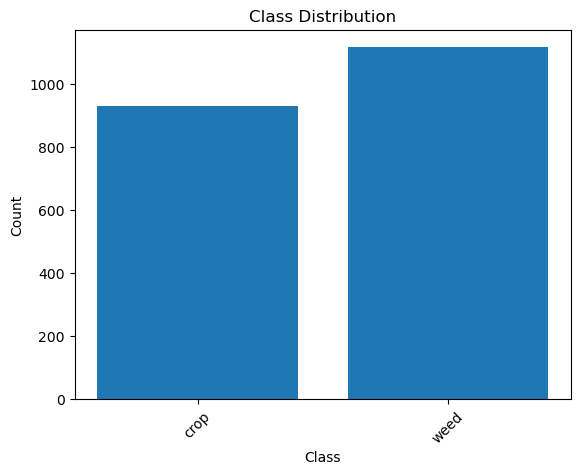

In [10]:
import os
import matplotlib.pyplot as plt

# Set the path to the directory containing the images
data_dir =  r'C:\Users\rakes\Weed_classification\weed_image_data\Ronin_OPEN_DB\Labeled_images'
# Get a list of image file paths in the crop directory

# Get the list of class directories
class_dirs = [os.path.join(data_dir, class_name) for class_name in os.listdir(data_dir)]

# Initialize empty lists for class labels and counts
class_labels = []
class_counts = []

# Iterate over the class directories and count the number of images in each class
for class_dir in class_dirs:
    class_name = os.path.basename(class_dir)
    images = os.listdir(class_dir)
    class_labels.append(class_name)
    class_counts.append(len(images))

# Create a bar plot of the class distribution
plt.bar(class_labels, class_counts)

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()


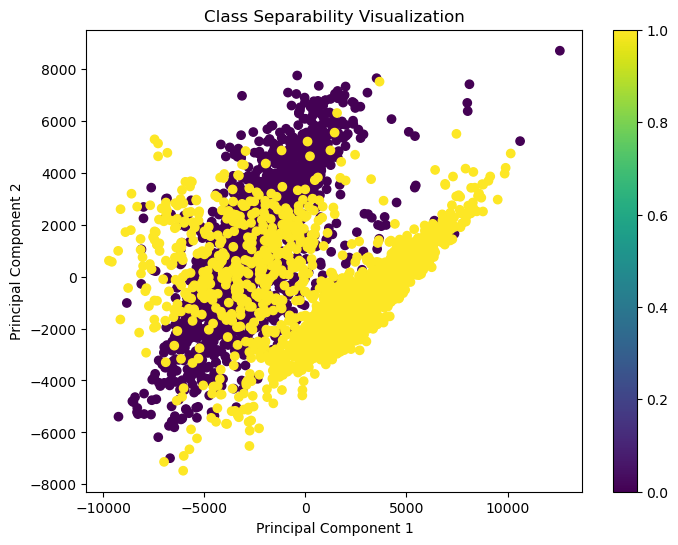

In [12]:
##Class separability visualization by PCA

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Set the paths to the train directory
train_dir = r'C:\Users\rakes\Weed_classification\weed_image_data\Ronin_OPEN_DB\slpit_dataset\train'

# Set the target image size for resizing
target_size = (128, 128)

# Set the number of components for PCA
n_components = 2

# Initialize empty lists for features and labels
features = []
labels = []

# Iterate over the class directories
for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)
    for filename in os.listdir(class_dir):
        image_path = os.path.join(class_dir, filename)
        image = load_img(image_path, target_size=target_size)
        feature = img_to_array(image).flatten()
        features.append(feature)
        labels.append(class_name)

# Convert features and labels to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Create a dictionary to map class labels to numeric values
label_mapping = {'crop': 0, 'weed': 1}

# Convert class labels to numeric values
numeric_labels = np.array([label_mapping[label] for label in labels])

# Apply PCA for dimensionality reduction
pca = PCA(n_components=n_components)
reduced_features = pca.fit_transform(features)

# Create a scatter plot of the reduced features
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=numeric_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Class Separability Visualization')
plt.colorbar()
plt.show()